# 1. Importing the necessary libraries. 

In [1]:
#Importing necessary modules 

%matplotlib inline

#Importing pandas so that data manipulation can be done in a grid format.
import pandas as pd 

#Importing mathematical libraries in order to perform mathematical operations.
import math as m 
import numpy as np 

#For good visualization.
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Reading the data as a data frame.

In [2]:
#Storing the data file in the data frame. 
DF= pd.read_csv("insurance.csv")

In [3]:
#Verifying if the data file has been stored in the dataframe or not.
DF.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# 3. Performing basic EDA.

In [4]:
#It is always a good practice to keep the original dataframe('DF') as it is.
#Copying the original dataframe('DF') into a new dataframe 'DF1'

DF1= DF

a) Shape of the data.

In [5]:
#INSIGHT:

#There are 1338 rows and 7 columns in the entire dataframe.
#From the given dataset we can infer that, 1338 rows should be enough to capture 7 columns.
#The chances of having Curse of Dimensionality is least likely.

DF1.shape

(1338, 7)

b) Datatype of each attribute.

In [6]:
#INSIGHT:

#Out of 7 columns, 
#3 are classified as object(either nominal or binary[string]
#2 are classified as int64(either continuous or binary[numeric])

DF1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
DF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


c) Checking the presence of missing values. 

In [8]:
#INSIGHT:

#There are no missing values in the dataframe.

DF1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#INSIGHTt: 

#There are no Nan values in the dataframe.

DF1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

d) 5 point summary of numericals.

In [10]:
#5 point summary of numeric attributes. 

#INSIGHT:

#1: For age, bmi and children; the mean is slighty more than the median. 
#2: For charges, mean is much more than the median; hence we can say this is positively skewed. 

DF1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


e) Distribution of bmi, age and charges columns. 

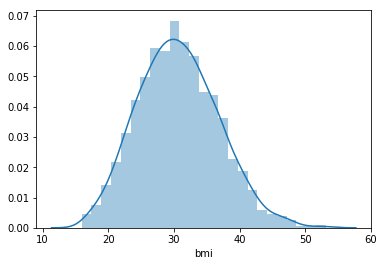

In [11]:
#Using a dist plot function and histogram to show the distribution for bmi, 
#age and charges columns in order to get a good sense of the distribution.


#INSIGHT: 

#bmi seems to follow a norml distribution, however the measure of skewness
#can be determined by comparing its mean, median and mode.
sns.distplot(DF1['bmi'])


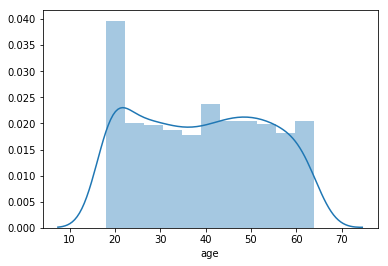

In [12]:
#INSIGHT: 

#Age is almost uniformly distributed.

sns.distplot(DF1['age'])

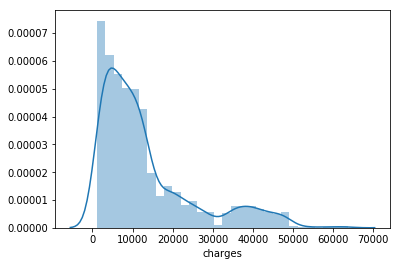

In [13]:
#INSIGHT:

#Charges is positively skewed and has a right tail which is longer 
#than the left tail.

sns.distplot(DF1['charges'])

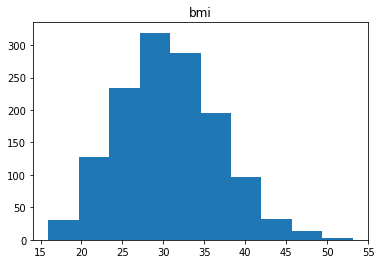

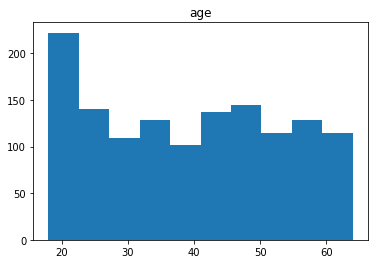

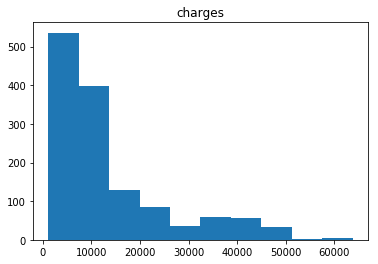

In [14]:
#Hisogram

plt.hist(x=DF1['bmi'])
plt.title('bmi')
plt.show()


plt.hist(x= DF1['age'])
plt.title('age')
plt.show()

plt.hist(x= DF1['charges'])
plt.title('charges')
plt.show()


f) Measure of skewness.

In [15]:
#We will understand this by checking the numerical values of mean, median and 
#mode respectively and derive the Skewness of 'age', 'bmi' and 'charges' 
#accordingly.

DF1.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
DF1.mode().T

,0
age,18
sex,male
bmi,32.3
children,0
smoker,no
region,southeast
charges,1639.56


In [17]:
DF1.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [18]:
#INSIGHTS:

#1: For 'age', mean and median is greater than the mode, here mean is greater
#than the median therefore the tail on the curve's right-hand side is longer 
#than the tail on the left-hand side, thus 'age' is 'positively skewed'.

#2: For 'bmi'; mean is less than the mode, median is less than the mode, 
#therefore the tail on the curve's left-hand side is longer than the tail on 
#the right-hand side, thus 'bmi' is slightly 'negatively skewed'. 

#3 For 'charges', mean is greater than the mode, median is greater than the
#mode,mean is greater than the median therefore, the tail on the curve's right-
#hand side is longer than the tail on the left-hand side, thus 'charges' is 
#'positively skewed'.


g) Check the presence of outliers in bmi, age and charges columns.

Q3 is: 34.69375
Q1 is: 26.29625
IQR is: 8.3975
Lower_Outlier lies below: 13.7
Upper_Outlier lies above: 47.290000000000006


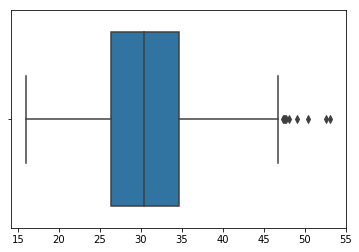

In [19]:
#Checking the presence of outliers in 'bmi'

#INSIGHTS:

#There are values above the largest value of the
#boxplot which lie above the calculated outlier limit & hence there are 
#outliers at the upper side.


Q3= DF1['bmi'].quantile(q=0.75)
Q1= DF1['bmi'].quantile(q=0.25)
IQR= Q3-Q1
print("Q3 is:", Q3)
print("Q1 is:", Q1)
print("IQR is:", IQR)

Limit= IQR*1.5

Lower_Outlier= Q1-Limit
Upper_Outlier= Q3+Limit

print("Lower_Outlier lies below:",Lower_Outlier)
print("Upper_Outlier lies above:",Upper_Outlier)

sns.boxplot(x=DF1[['bmi']])

Q3 is: 51.0
Q1 is: 27.0
IQR is: 24.0
Lower_Outlier lies below: -9.0
Upper_Outlier lies above: 87.0


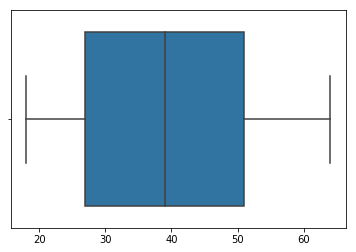

In [21]:
#Checking the presence of outliers in age.

#INSIGHTS:

#As the boxplot shows no values which are out of the lower side limit & 
#upper side limit there are no outliers in age.


Q3= DF1['age'].quantile(0.75)
Q1= DF1['age'].quantile(0.25)
IQR= Q3-Q1

print('Q3 is:', Q3)
print('Q1 is:', Q1)
print('IQR is:', IQR)

Limit= IQR*1.5

Lower_Outlier= Q1-Limit
Upper_Outlier= Q3+Limit

print("Lower_Outlier lies below:",Lower_Outlier)
print("Upper_Outlier lies above:",Upper_Outlier)

sns.boxplot(x=DF1[['age']])

Q3 is: 16639.912515
Q1 is: 4740.28715
IQR is: 11899.625365
Lower_Outlier lies below: -13109.1508975
Upper_Outlier lies above: 34489.350562499996


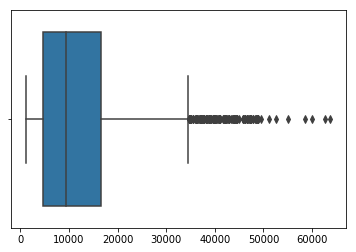

In [22]:
#Checking the presence of outliers in charges. 

#INSIGHTS: 

#There are values above the largest value of the boxplot which lie above 
#the calculated outlier limit & hence there are outliers at the upper side.



Q3= DF1['charges'].quantile(0.75)
Q1= DF1['charges'].quantile(0.25)
IQR= Q3-Q1

print('Q3 is:', Q3)
print('Q1 is:', Q1)
print('IQR is:', IQR)

Limit= IQR*1.5

Lower_Outlier= Q1-Limit
Upper_Outlier= Q3+Limit

print("Lower_Outlier lies below:",Lower_Outlier)
print("Upper_Outlier lies above:",Upper_Outlier)

sns.boxplot(x=DF1[['charges']])

h) Distribution of categorical columns (include children)  

male      676
female    662
Name: sex, dtype: int64

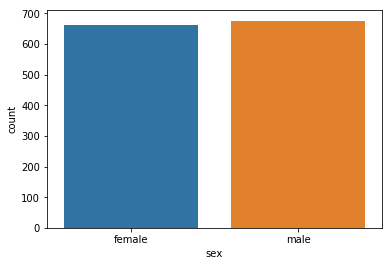

In [23]:
#Checking the distribution of categorical columns
#Distribution of sex column.

#INSIGHTS: 

#Although the number of female contractors are less than the number of 
#male contractors, there is barely any significant difference in their count.

sns.countplot(DF1['sex'])
DF1['sex'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

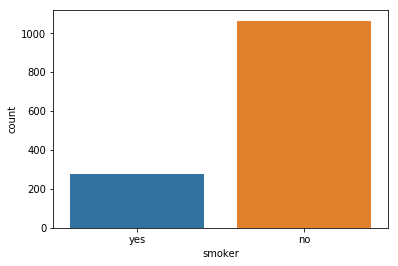

In [24]:
#Distribution of smoker column. 

#INSIGHTS:

#1) Frequent smokers have higher health risks, and are considered greatly for 
#the purpose of providing insurance.

#2) Insurance policy for smokers must be designed in a such a way that, the
#charges are adequately applied such that risk of loss in reduced.

#3) From the diagram we can infer that, 
#the number of non-smokers are much more than the number of smokers.

#4) Although there is signiicant difference in their count, insurance will 
#definately be given to smokers, but will also be given to non-smokers as
#insurance for any non-smoker might vary differently.

sns.countplot(DF1['smoker'])
DF1['smoker'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

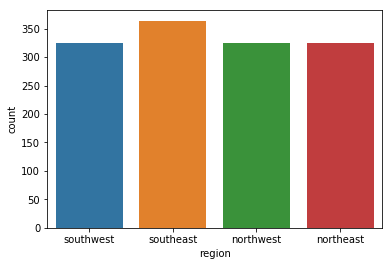

In [25]:
#Distribution for the region column.

#INSIGHTS:

#1) People living in good localities must be given insurance and higher
#premium, these people are potential customers.

#2)Also, with the locality one can determine if the chances of getting 
#disease is less or more. Like, slums are more prone to diseases than good 
#localities due to the difference in hygiene. However, that does not gaurantee
#that residents of good localities will not be prone to any health issues.





sns.countplot(x=DF1['region'])
DF1['region'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

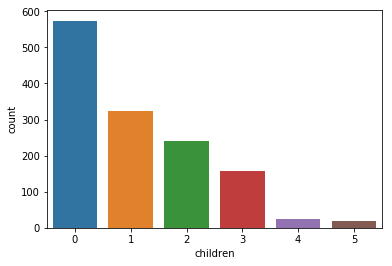

In [26]:
#Distribution for the children(depedends) column.

#INSIGHTS: 

#1) There is insurance given based on the number of dependents in the family 
#as well. 

#2) An insurance policy is designed for a father who is 59 years, mother is 
#50 years and two children who are 15 and 25 years old.

#3)This is crucial especially when the occupation of the family can severely 
#affect their helth. For example a child working at an oil drilling site, 
#father working at a chemical factory, etc. 

#4)These are potential customers and an insurance policy must be designed 
#in such a way that the loss that can be incurred by the company is reduced 
#and the customers are adequately charged. 

#5) From the diagram we can infer that the number of dependents are greatly 
#present in the range 0-3 and much less in the range 4-5.




sns.countplot(x=DF1['children'])
DF1['children'].value_counts()

i)  Pair plot that includes all the columns of the data  frame. 

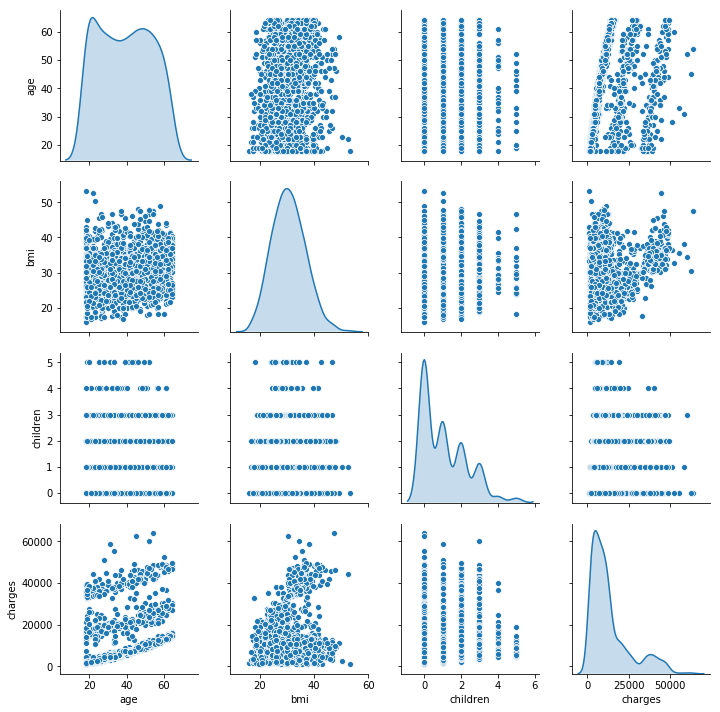

In [27]:
sns.pairplot(DF1, diag_kind='kde')

# 4. The following questions need statistical evidence.  

a.  Do charges of people who smoke differ significantly  from the people who don't?  

In [28]:
#Formulationg the Hyposthesis:

# Null Hypothesis (H0): Charges of people who 'smoke' DOES NOT differ from 
#the charges of those who 'don't smoke'.

# Alternate Hypothesis (H1): Charges of people who 'smoke' DOES differ from 
#charges of those who 'don't smoke'.

In [29]:
DF2= pd.DataFrame(DF1[['smoker','charges']])
DF3= DF2.groupby('smoker')
DF4= pd.DataFrame(DF3.get_group('yes'))
DF5= pd.DataFrame(DF3.get_group('no'))

DF4= DF4.drop(labels='smoker',axis=1)
DF5= DF5.drop(labels='smoker',axis=1)

print("mean of people who smoke:",DF4['charges'].mean())
print("mean of people who don't smoke:",DF5['charges'].mean())
print("variance of people who smoke :",DF4['charges'].var())
print("variance of people who don't smoke:",DF5['charges'].var())
print("std. dev of people who smoke:",DF4['charges'].std())
print("std. dev of people who don't smoke:",DF5['charges'].std())

from scipy.stats import ttest_ind

stat , pvalue = ttest_ind(DF4['charges'], DF5['charges'], equal_var=True)

print("The tstat is:",stat)
print("The p-value is:",pvalue)

if pvalue < 0.05:
    print("Since the p-value is less than the level of significance, which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis(H0)")
else:
    print("Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis(H0)")

mean of people who smoke: 32050.23183153285
mean of people who don't smoke: 8434.268297856199
variance of people who smoke : 133207311.20634921
variance of people who don't smoke: 35925420.49611172
std. dev of people who smoke: 11541.547175589121
std. dev of people who don't smoke: 5993.781819194933
The tstat is: 46.664921172723716
The p-value is: 8.271435842177219e-283
Since the p-value is less than the level of significance, which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis(H0)


In [30]:
###############################################################

b. Does bmi of males differ significantly from that of females?  

In [ ]:
#Null hypothesis (H0): BMI of male does not significantly differ from that of
#females.

#Alternate hypothesis (H1): BMI of male differs significantly from that of 
#females

In [38]:
Insure2_DF=pd.DataFrame(DF1.iloc[:,1:3])
Insure22_DF=Insure2_DF.groupby('sex')
Insure20_DF=pd.DataFrame(Insure22_DF.get_group('female'))
Insure21_DF=pd.DataFrame(Insure22_DF.get_group('male'))

Insure20_DF=Insure20_DF.drop(labels='sex',axis=1)
Insure21_DF=Insure21_DF.drop(labels='sex',axis=1)

from scipy.stats import ttest_ind

stat1 , pvalue1 = ttest_ind(Insure20_DF['bmi'], Insure21_DF['bmi'], equal_var=True)

print("The tstat is:",stat1)
print("The p-value is:",pvalue1)

if pvalue1 < 0.05:
    print("Since the p-value is less than the level of significance which shows insufficient evidence that the Null hypothesis is true & hence rejecting the Null-Hypothesis(H0)")
else:
    print("Since the p-value is greater than the level of significance which shows sufficient evidence that the Null hypothesis is true & hence accepting the Null-Hypothesis(H0)")

The tstat is: -1.696752635752224
The p-value is: 0.08997637178984932
Since the p-value is greater than the level of significance which shows sufficient evidence that the Null hypothesis is true & hence accepting the Null-Hypothesis(H0)


In [32]:
##########################################################################

c. Is the proportion of smokers significantly different in different genders?

In [40]:
#Null Hypothesis (H0): Proportion of smokers in different genders is not 
#different i.e. pi1=pi2 where pi1 is male smokers proportion & pi2 is female 
#smokers proportion.

#Alternate Hypothesis (H1): Proportion of smokers in different genders is 
#significantly different i.e. pi1~=pi2,pi-pi2~=0

In [41]:
Insure3_df=pd.DataFrame(DF1[['smoker','sex']])

Insure32_df=Insure3_df.groupby('smoker')

Insure30_df=pd.DataFrame(Insure32_df.get_group('yes'))

Insure30_df=Insure30_df.drop(labels='smoker',axis=1)

Male,Female=Insure30_df['sex'].value_counts()

#Assuming the alpha to be 0.05 hence the corresponding critical-value for the
#two-tail test would be -1.96 & +1.96

#Hence Zstat<-1.96 of Zstat>1.96 will lead to rejection of Null-Hypothesis
Total_Male,Total_Female=DF1['sex'].value_counts()

p1=Male/Total_Male
p2=Female/Total_Female

#Assuming pi1=pi2 which means pi1-pi2=0 since we're trying to prove the null 
#hypothesis

pbar=(Male+Female)/(Total_Male+Total_Female)

from math import sqrt
Zstat=(p1-p2)-0/sqrt(pbar*(1-pbar)*((1/Total_Male)+(1/Total_Female)))
critical_value1=-1.96
critical_value2=1.96

print("The Zstat is:",Zstat)

if critical_value1<=Zstat<=critical_value2:
    print("Since the Zstat lies within the limits of critical value which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis")
else:    
    print("Since the Zstat doesn't lie within the limits of critical value which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis")

The Zstat is: 0.06149108850712384
Since the Zstat lies within the limits of critical value which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis


d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [42]:
#Null Hypothesis (H0): The distribution of bmi across women with one child,
#two child or no child is the same.

#Altenrate Hypothesis (H1): The distribution of bmi across women with one child,
#two child or no child is not the same.

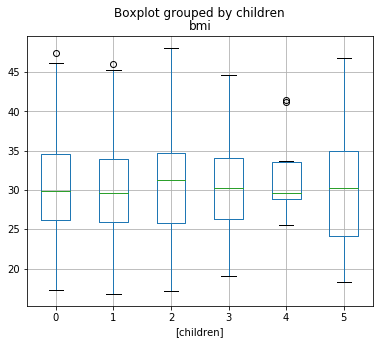

In [43]:
Insure4_DF= pd.DataFrame(DF1[['bmi','sex','children']])

Insure42_DF= Insure4_DF.groupby('sex')

Insure40_DF= pd.DataFrame(Insure42_DF.get_group('female'))

Insure40_DF.boxplot(by='children',figsize=(6,5))

Insure41_DF=Insure40_DF.loc[Insure40_DF['children']==0,'bmi']
Insure43_DF=Insure40_DF.loc[Insure40_DF['children']==1,'bmi']
Insure44_DF=Insure40_DF.loc[Insure40_DF['children']==2,'bmi']

In [44]:
# Null Hypothesis (H0): Variance of all the 3 data-set i.e. women with no 
#children, 1 child & 2 children are homegenous.

# Alternate Hypothesis H1: Vairance of all the 3 data-set i.e. women with no 
#children,1 child & 2 children are non-homogenous.


In [48]:

from scipy.stats import levene

stat,pv=levene(Insure41_DF,Insure43_DF,Insure44_DF)

print("The F-stat is:",stat)
print("The pvalue is:",pv)

if pv>0.05:
    print("There is homogenity of variance hence the ANOVA condition is satisfied")
else:
    print("There is no homogenity in the variance hence the ANOVA condition is un-satisfied")

The F-stat is: 0.9433311607108589
The pvalue is: 0.3899432394522804
There is homogenity of variance hence the ANOVA condition is satisfied


In [49]:
from scipy.stats import f_oneway

F,p=f_oneway(Insure41_DF,Insure43_DF,Insure44_DF)

print("F-statistic is:",F)
print("p-value is:",p)

if p < 0.05:
    print("Since the p-value is less than the level of significance which shows insufficient evidence that the null hypothesis is true & hence rejecting the Null-Hypothesis")
else:
    print("Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis")

F-statistic is: 0.3344720147757968
p-value is: 0.7158579926754841
Since the p-value is greater than the level of significance which shows sufficient evidence that the null hypothesis is true & hence accepting the Null-Hypothesis
